In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /home/sseethalla25/.uetoolsrc read.


In [2]:
from input import *
from uedge.rundt import *
from uedge.hdf5 import *
import matplotlib.pyplot as plt
from uetools import *
import sys
sys.path.append('utils')

filename = "temp_py_puff_last_ii2.hdf5"
hdf5_restore(filename)
bbb.exmain() # recovers solution


Reading uedge.hdf5-style save-file 'temp_py_puff_last_ii2.hdf5'.
>>> Save read successfully
(18, 10, 8)

Reading uedge.hdf5-style save-file 'temp_py_puff_last_ii2.hdf5'.
>>> Save read successfully
 UEDGE 8.1.1.0                                                                         
*** For isimpon=7, set afracs, not afrac ***
 ***Impurity file using pre-2012 format is C_rates.strahl                                                                                                                                                                                                                                                  
 TARGET MATERIAL IS      GRAPHITE         
 BOMBARDING IONS ARE     D    
 Reading grid data from gridue.hdf5.hdf5
 Grid data read successfully:
     file name:   gridue.hdf5.hdf5
     run-ID:      EFITD    05/08/2002    #110465  3500ms                      
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=     0.7936440448152378     nfe=      1
  U

In [4]:
bbb.igasrb

array([[10.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [7]:
bbb.npltsor=1     #number sources on plates; must be <= 10
bbb.sputtr = 1
bbb.sputtrb=1
# Puffs: indices correspond to source # - limited by npltsor

# Outer wall
bbb.igspsorrb[:,0] =   [2,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Puffed species index (PYTHON OR BASIS INDICES?)
bbb.igasrb[:,0]=      [10,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Gas currents from outer wall [Amp]
bbb.ygasrb[:,0]=      [0.02,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Location of wall source: origin set by issorlb
bbb.wgasrb[:,0]=      [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Total Cosine widths of source

In [8]:
bbb.isimpon=7
bbb.afracs = 1e-3
bbb.ngbackg=0
bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
UeRun().converge(savefname="temp_py_puff", dtreal=1e-9)

*** For isimpon=7, set afracs, not afrac ***
 Reading grid data from gridue.hdf5.hdf5
 TARGET MATERIAL IS      GRAPHITE         
 BOMBARDING IONS ARE     D    
 Grid data read successfully:
     file name:   gridue.hdf5.hdf5
     run-ID:      EFITD    05/08/2002    #110465  3500ms                      
Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
 iter=    0 fnrm=      875841.1638082565     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
*** For isimpon=7, set afracs, not afrac ***
 Reading grid data from gridue.hdf5.hdf5
 TARGET MATERIAL IS      GRAPHITE         
 BOMBARDING IONS ARE     D    
 Grid dat

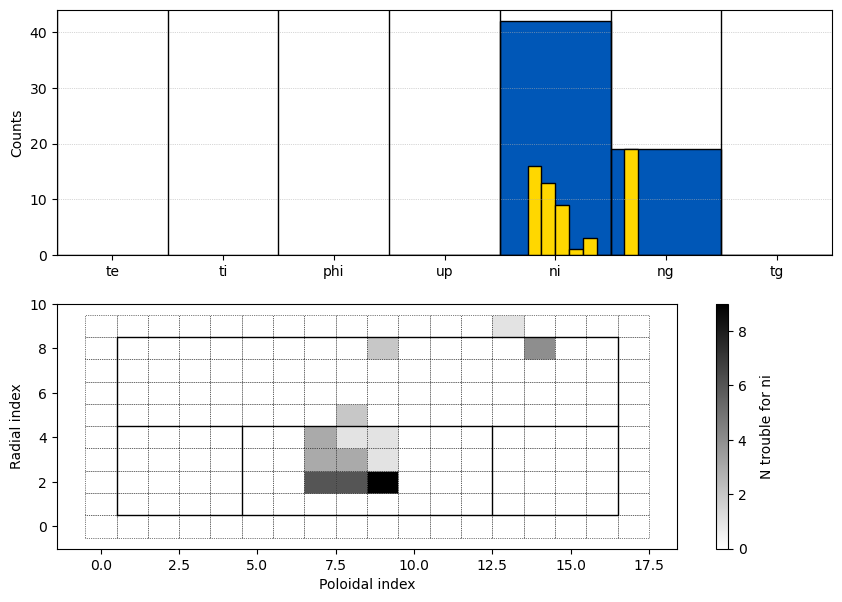

In [10]:
c.solver.failureanalysis('temp_py_puff_last_ii2.hdf5', equation='ni');


In [8]:
c.about.uedge_setup()

The UEDGE set-up contains:
  - 2 hydrogenic species:
    - D ions
    - Inertial D atoms
  - 2 impurity species:
    - Charge-state resolved C12
      - Fully force-balance
    - Fixed-fraction C12

               0      1      2      3      4      5      6      7  
Ion array : [  D+ ,   D0 ,  C+1 ,  C+2 ,  C+3 ,  C+4 ,  C+5 ,  C+6 ]
Gas array : [  D0 ,   C0 ]


In [5]:
c.interpolate.solution('../testcase_hires/gridue.hdf5', oldsave='temp_py_last_ii2.hdf5');

In [6]:
com.nxleg[0,], com.nxcore[0,], com.nycore[0], com.nysol[0]

(array([0, 2]), array([0, 4]), np.int64(0), np.int64(2))

*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 3.94e+37

0.0 1.7863698045576925e+19
0


/home/sseethalla25/UETOOLS-Reactor/jupyter/testcase_lores/plot_sinksource.py:95: RuntimeWarning: invalid value encountered in scalar divide
  linewidth=3, alpha = fngysi[ix,s]/maxpuff)


ValueError: alpha (nan) is outside 0-1 range

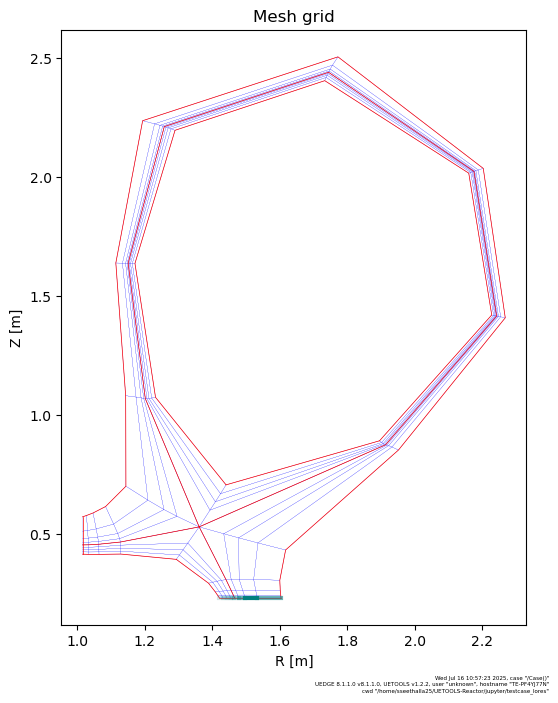

In [5]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c = Case(store_defaults = True)
c.populate()
plot_sinksource.plot_sinksource(c)

In [10]:
c.populate()

*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 8.56e+02



*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 8.56e+02



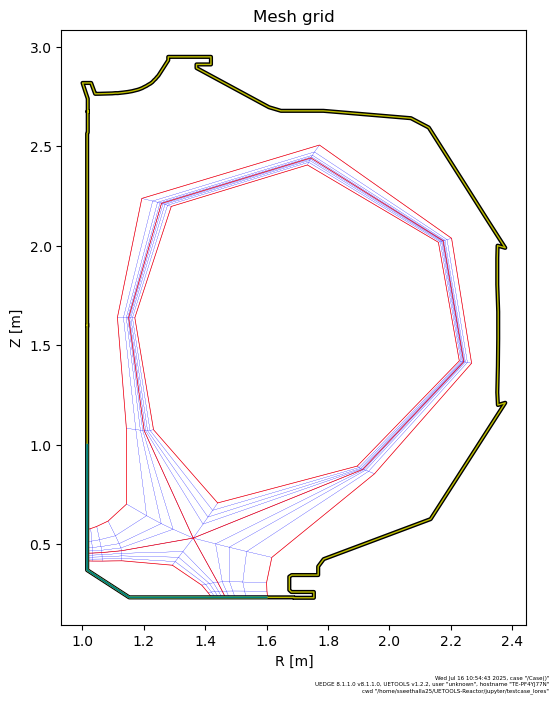

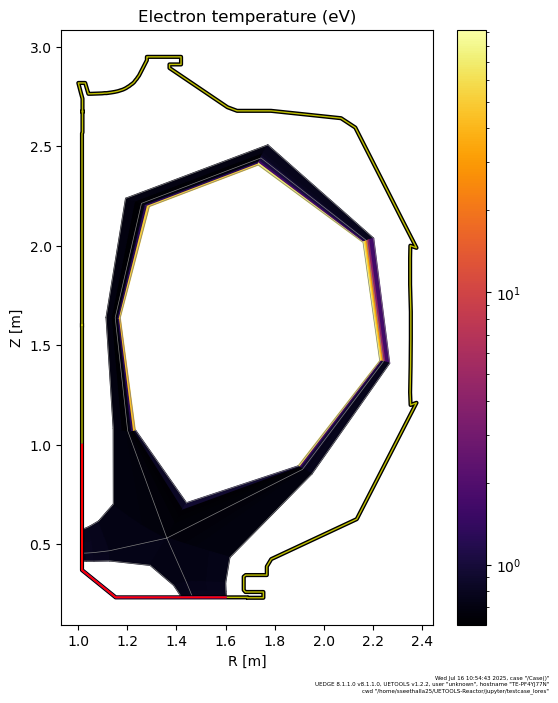

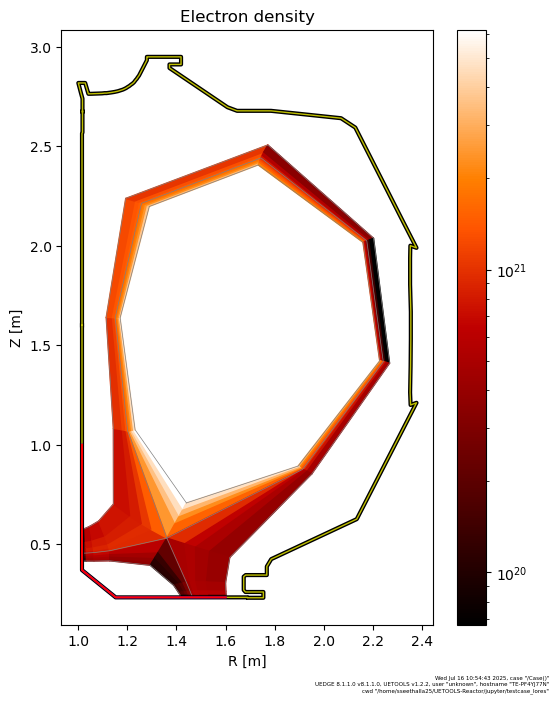

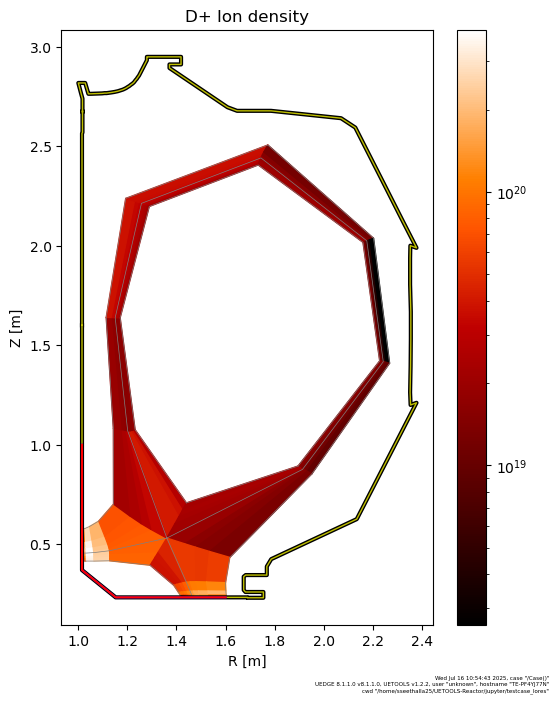

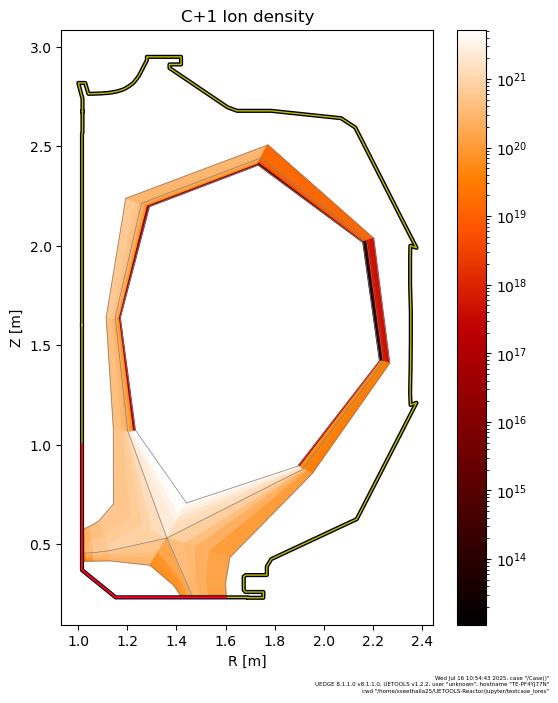

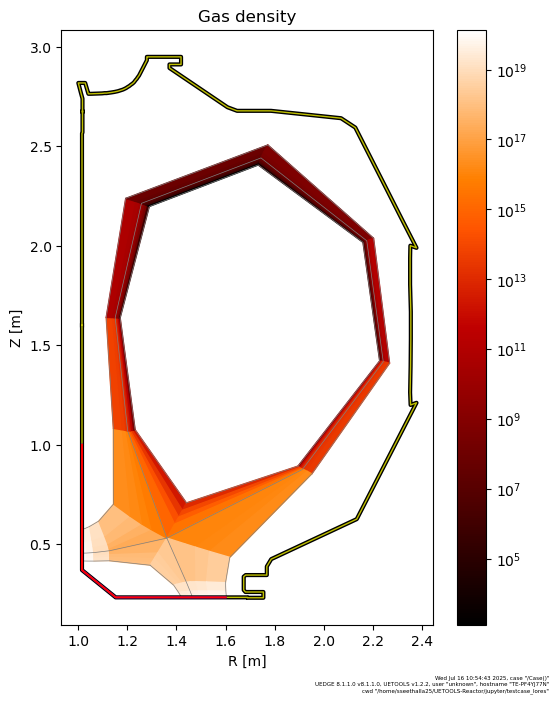

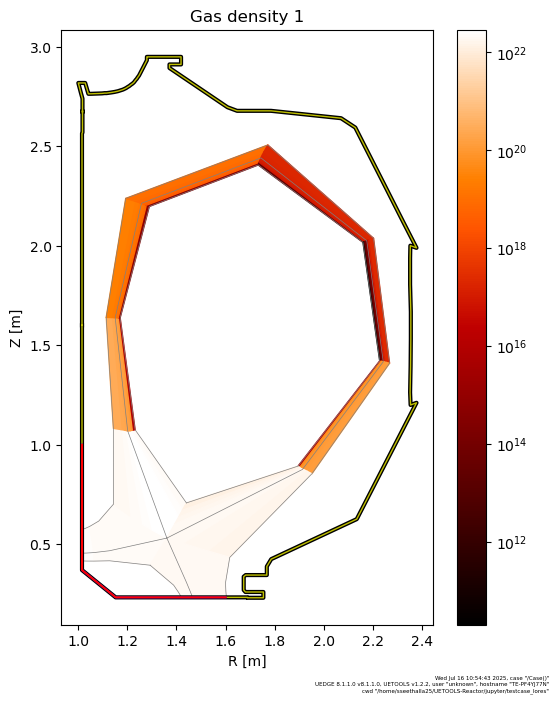

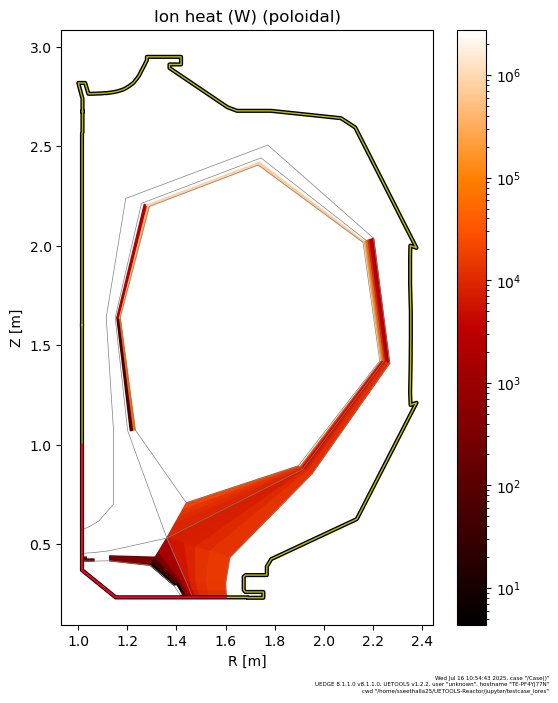

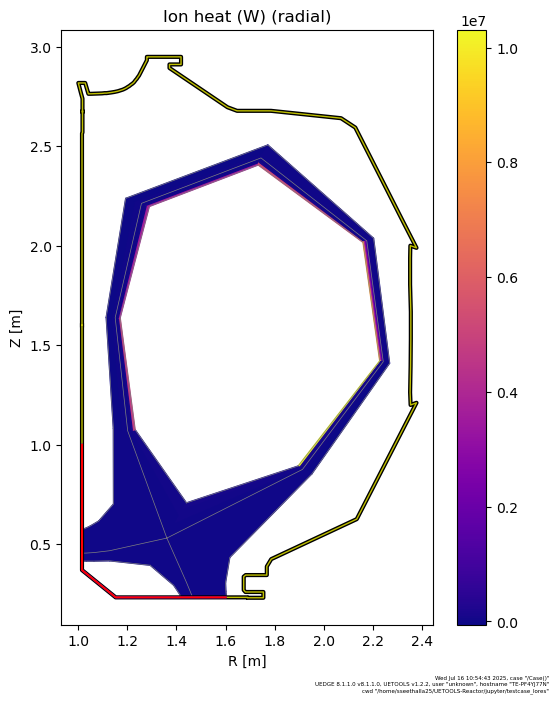

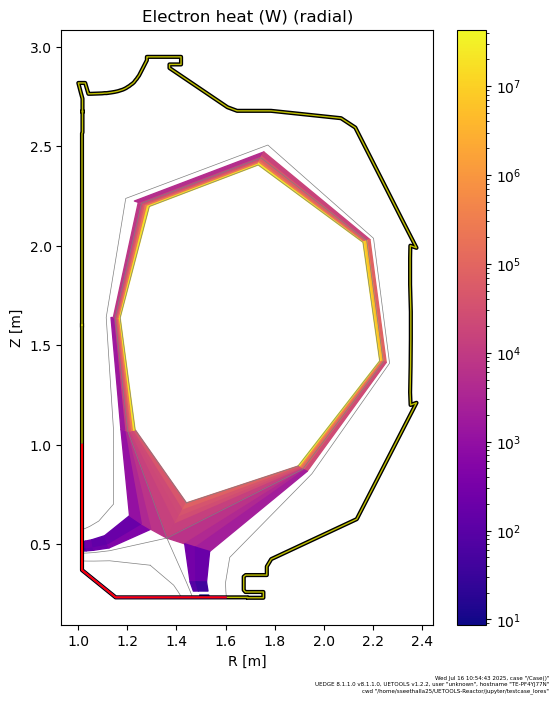

In [11]:
import seaborn as sns
sns.reset_orig()
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
   aspect="auto"
  );
c.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    aspect="auto",
);
c.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    aspect="auto"
);
c.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='D+ Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='gist_heat',
    title='C+1 Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ng[:,:,0], 
    log=True, 
    cmap='gist_heat',
    title='Gas density',
    aspect="auto",
    # y
);
c.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Gas density 1',
    aspect="auto",
    # y
);
c.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (poloidal)',
    aspect="auto",
    # zrange=(1, 1e4)
);
c.plot.mesh(
    bbb.feiy, 
    # log=True, 
    cmap='plasma',
    title='Ion heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3)
);
c.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3) 
);
plt.show()

8 16


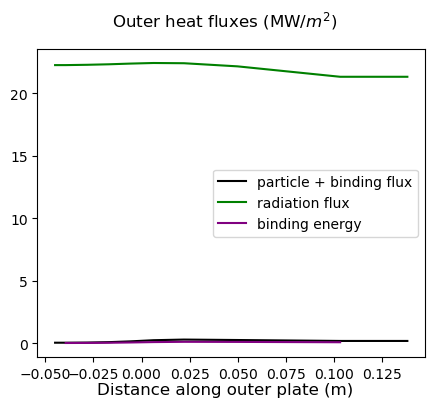

In [12]:
fig, axs = plt.subplots(1, figsize=(5,4))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)')
x = com.yyrb[1:-1]
axs.plot(com.yyrb,1.e-6*(bbb.sdtrb), label='particle + binding flux', color='0')
axs.plot(com.yyrb,1.e-6*(bbb.sdrrb), label='radiation flux', color='g')
axs.plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, color='purple', label='binding energy')
print(com.nisp,com.nx)
axs.legend()
plt.savefig('outer_div_plot2.png')
plt.show()


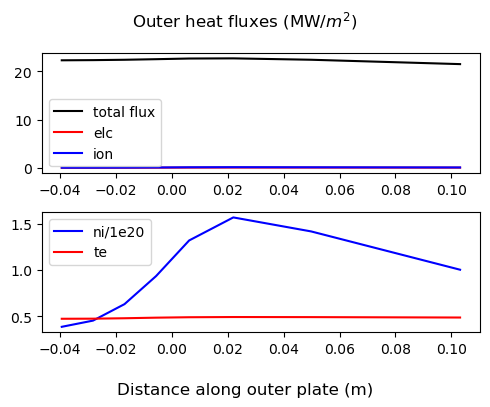

Integrated total heat: 4.053132, radiated heat: 4.016402 MW; f_rad_div: 0.990938


In [13]:
fig, axs = plt.subplots(2, figsize=(5,4))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)')
leftIndex = 1
rightIndex = -1
x = com.yyrb[leftIndex:rightIndex]
axs[0].plot(x,1.e-6*(bbb.sdtrb[leftIndex:rightIndex]+bbb.sdrrb[leftIndex:rightIndex]), label='total flux', color='0')
# axs[0].plot(com.yyrb,1.e-6*(bbb.sdrrb)*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb,1.e-6*bbb.sdrrb*10, label='tot rad flx*10')
# axs[0].legend(fontsize=14)
# axs[0].plot(com.yylb,1.e-6*bbb.sbindrb)
axs[0].plot(x, bbb.sderb[leftIndex:rightIndex]*1e-6, '-r', label='elc')
axs[0].plot(x, bbb.sdirb[leftIndex:rightIndex]*1e-6, '-b', label='ion')
# axs[1].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6/5, color='purple', label='binding energy / 5')
# print(com.nisp,com.nx)
# axs[2].plot(x, bbb.engirb[1:com.ny+1,com.nisp-1,com.nxpt-1], '--r', label='ave ion energy')
# axs[2].plot(com.yylb, bbb.pwr_pltz[0:ny+1,2*nxpt), '--b', label='rad')
axs[0].legend()
axs[1].plot(x, bbb.ni[com.nx+1,1:-1,0]/1e20, '-b', label='ni/1e20')
axs[1].plot(x, bbb.te[com.nx+1,1:-1]/bbb.ev, '-r', label='te')
axs[1].legend()
plt.tight_layout()
# axs[3].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, '-r', label='binding energy')
# axs[3].plot(x, bbb.pradhyd[com.nx+1,1:-1]/1e7, '-b', label='prad by hyd * 1e-7')
# axs[3].legend()
plt.savefig('outer_div_plot.png')
plt.show()
com.yyrb.size
np.mean(1.e-6*(bbb.sdrrb))
from scipy.integrate import simpson
rad_heat = simpson(y=(1.e-6*(bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
tot_heat = simpson(y=(1.e-6*(bbb.sdtrb+bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
print(f'Integrated total heat: {tot_heat:3f}, radiated heat: {rad_heat:3f} MW; f_rad_div: {(rad_heat/tot_heat):3f}')

UETOOLS-style save successfully restored from .../jupyter/testcase_hires/nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.27e+00


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.27e+00



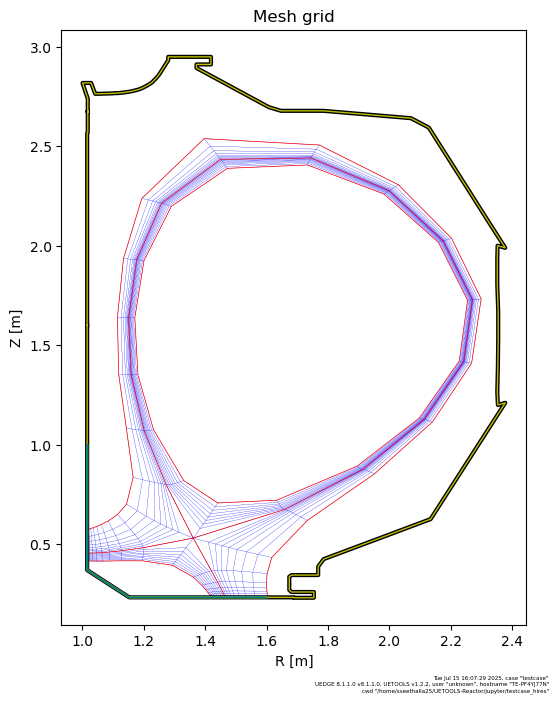

In [22]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c = Case('../testcase_hires/input.yaml')
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
   aspect="auto"
  );

In [24]:
c.about.uedge_setup()

The UEDGE set-up contains:
  - 2 hydrogenic species:
    - D ions
    - Inertial D atoms
  - 1 impurity species:
    - Charge-state resolved C12
      - Fully force-balance

               0      1      2      3      4      5      6      7  
Ion array : [  D+ ,   D0 ,  C+1 ,  C+2 ,  C+3 ,  C+4 ,  C+5 ,  C+6 ]
Gas array : [  D0 ,   C0 ]


In [23]:
com.nxleg[0,], com.nxcore[0,], com.nycore[0], com.nysol[0]

(array([0, 2]), array([0, 4]), np.int64(0), np.int64(2))